**Анализ рынка видеоигр**

Содержание

Описание проекта

- Шаг 1. Открыть

Вывод по первому шагу

- Шаг 2. Подготовить данные

Вывод по второму шагу

- Шаг 3. Проведём исследовательский анализ данных

Вывод по третьему шагу

- Шаг 4. Составим портрет пользователя каждого региона

Вывод по четвертому шагу

- Шаг 5. Проверим гипотезы

Вывод по пятому шагу

- Шаг 6. Общий вывод

Реккомендации бизнесу


   **О проекте**
   
Задача: найти из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Что предстоит сделать?

Шаг 1. Открыть файл

Ознакомиться с данными.

Шаг 2. Подготовить данные

Подготовить таблицу для дальнейшего исследования, а именно:

- Найти и понять природу пропусков. При необходимости, заменить.

- Преобразовать данные к нужным типам для дальнейшей работы с ними.

- Посчитать суммарные продажи во всех регионах

Шаг 3. Провести исследовательский анализ данных

Определить, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

Посмотреть, как менялись продажи по платформам.

Определить какие платформы лидируют по продажам.

Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Соотнести выводы с продажами игр на других платформах.

Узнать какой жанр наиболее прибыльный.

Шаг 4. Составить портрет пользователя каждого региона

Самые популярные платформы (топ-5)

Самые популярные жанры (топ-5)

Узнать влияет ли рейтинг ESRB на продажи в отдельном регионе

Шаг 5. Проверить гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Общий вывод. 

Рекомендации бизнесу


### **Шаг 1. Откройте файл с данными и изучите общую информацию**

***Загрузим предполагаемые библиотеки и изучим данные датасета***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math 

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод по первому шагу**

Видно что очень много пропусков в столбцах Critic_Score, User_Score, Rating

### Шаг 2 Переработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('BuPu')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [7]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

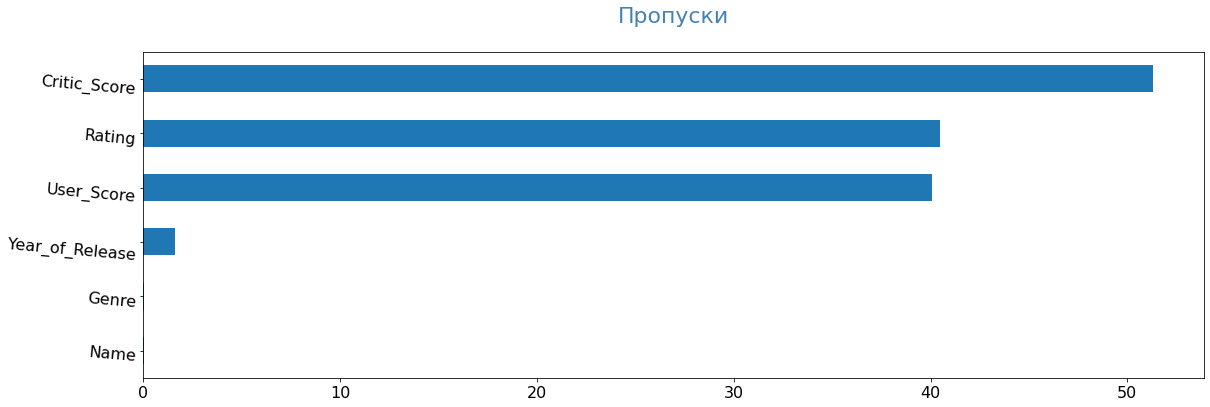

In [8]:
pass_value_barh(df)

**Видем что есть всего два пропуска в столбцах имя и жанр, так же всего 2 % пропусков в сталбце год выпуска их можно убрать** 

In [9]:
df.columns=df.columns.str.lower()#сделаем все столбцы в нижнем регистре
df.columns #проверим что все стало в нижнем регистре 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*Проверим отдельные столбцы*  

In [10]:
df['genre'].unique()#проверяем уникальные значения

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df.dropna(subset=['genre'], inplace=True)#Так как пропусков мало и они связаны со старой игрой по которой нет данных, смело удаляем

In [13]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df.dropna(subset=['year_of_release'], inplace=True)#Уберём и их так как выписывать каждую игру и узнавать дату выпуска слишком долгий процесс и пропусков всего 2%   

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
df['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

In [20]:
df['platform'].unique()#проверяем уникальные значения

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
df[df['user_score']=='tbd']#проверяем значение tbd 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


**Видим что у tbd нет определенной логики назначения ни по годам ни по платформе, заменим в будущем на пропуски**

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int')#переведем в int 
df['critic_score'] = df['critic_score'].fillna(0).astype('int')#что бы перевести в int пришлось заполнить 0 но в расчет брать их не будем
df['rating']=df['rating'].fillna('o')#заменим рейтинг с пропусками на o чтоб потом их можно было бы учитывать

In [23]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [24]:
df['user_score']=df['user_score'].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Перевели данные в нужный нам формат и убрали часть пропусков** 

***Считаем суммарные продажи во всех регионах***

In [26]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [27]:
df#проверим что все работает 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,o,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,o,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,NaN,o,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,NaN,o,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,NaN,o,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,NaN,o,0.01


In [28]:
df.duplicated() 
# подсчёт количества дубликатов
df.duplicated().sum()

0


<b>Мое исправление</b> 

Добавил код на поиски дубликатов, дубликатов нет

По природе происхождения  пропусков думаю скорее всего отсутствие рейтинга (оценок) означает либо

Игра слишком старая

Игра непопулярна

Игра еще не успела получить рейтинг в силу новизны

Прочие причины (не выгрузили и тд)

Это касается как рейтинга критиков, так и рейтинга пользователей.

Повлиять на оценки мы никак не можем, взять среднию или медиану будет неправильно 
</div>

**Приступаем к Иследовательскому анализу**

In [29]:
# Посмотрим сколько игр выпускалось в разные годы
df.groupby('year_of_release').agg({'name':'count'}).style.bar()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


*Скорее всего данные до 1995 года нас интересовать не будут*

<AxesSubplot:xlabel='platform'>

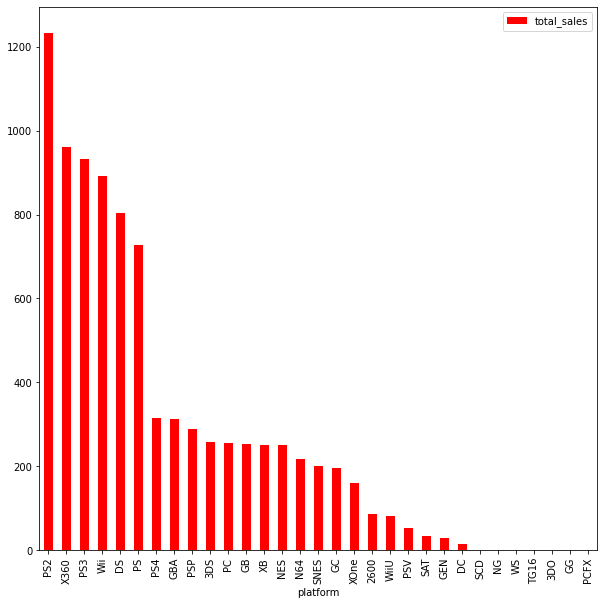

In [30]:
df.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,10), color='r')#по гистрограмме определим самые прибыльные платформы

Семейство PS в лидерах, потом идут Xbox, посмотрим на лидеров внимательней

In [31]:
def hist_of_platform(Model, title):
    df[df['platform'] == Model]\
        .groupby('year_of_release')\
        .agg({'total_sales':'sum'})\
        .plot(kind='bar', figsize=(6,8), color='g')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (млн.)')
    plt.title(title)
    plt.legend(['Общие продажи'])

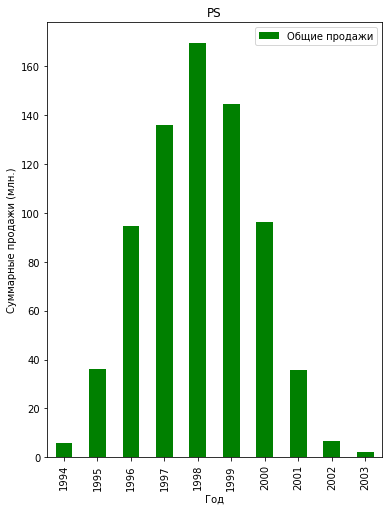

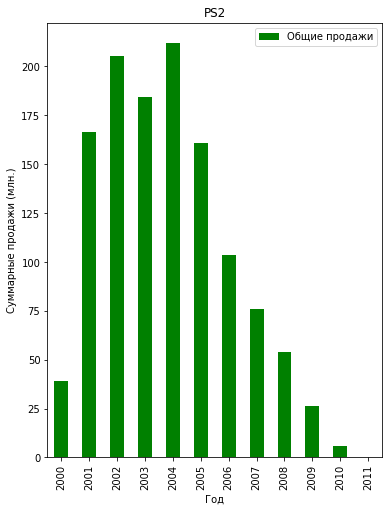

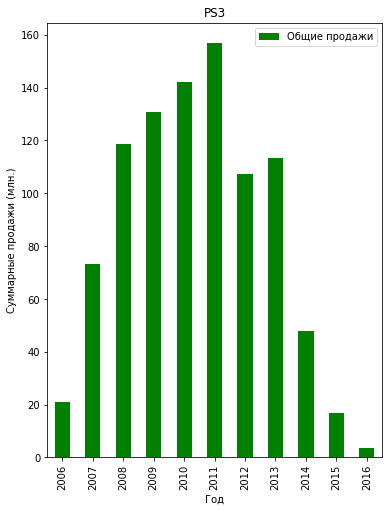

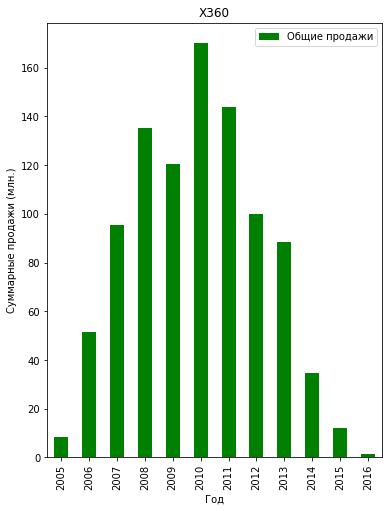

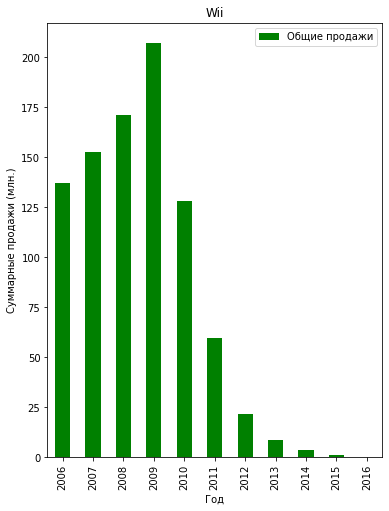

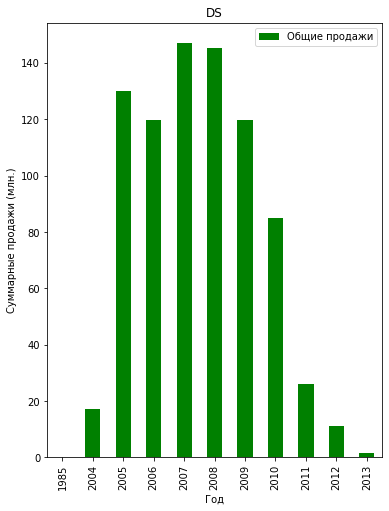

In [32]:
hist_of_platform('PS', 'PS')
hist_of_platform('PS2', 'PS2')
hist_of_platform('PS3', 'PS3')
hist_of_platform('X360', 'X360')
hist_of_platform('Wii', 'Wii')
hist_of_platform('DS', 'DS')

***Пик продаж на платформе приходится в среднем на 4-й - 5-й год выпуска, каждая платформа в среднем существует 10 лет(кроме PC и DS, они живут вечно), у семейства PS как только после пика продаж происходит спад продаж они выпускают новую консоль***

Возьмем два семейства (PS,Xbox) для определения актуального периода

In [33]:
PS = df[df['platform']== 'PS']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})
PS2 = df[df['platform']== 'PS2']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})
PS3 = df[df['platform']== 'PS3']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})
PS4 = df[df['platform']== 'PS4']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})

In [34]:
PS

,total_sales
year_of_release,
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,96.37
2001,35.59
2002,6.67


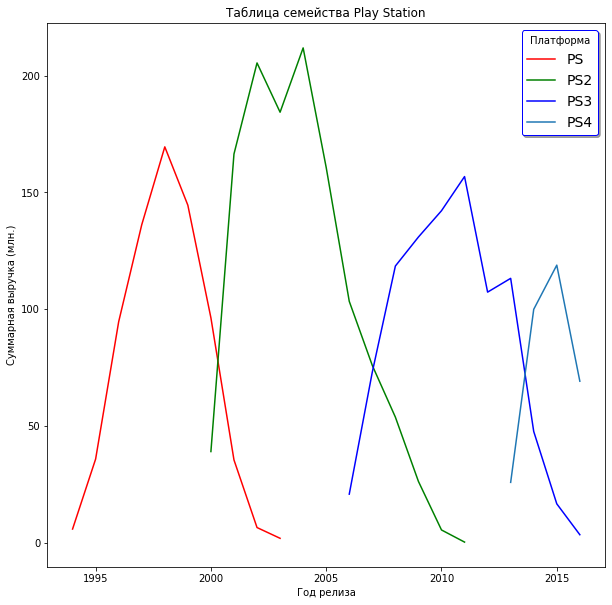

In [35]:
ax = plt.figure( figsize=(10, 10))
plt.plot(PS, 'r',
        PS2, 'g',
        PS3, 'b',
        PS4)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства Play Station')
plt.legend(['PS','PS2', 'PS3', 'PS4'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

In [36]:
XB = df[df['platform']== 'XB']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})
X360 = df[df['platform']== 'X360']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})
XOne = df[df['platform']== 'XOne']\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})

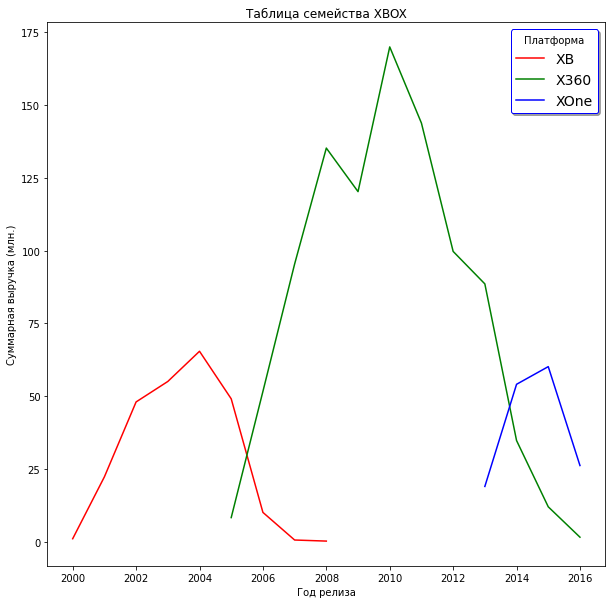

In [37]:
ax = plt.figure( figsize=(10, 10))
plt.plot(XB, 'r',
        X360, 'g',
       XOne, 'b',)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства XBOX')
plt.legend(['XB','X360', 'XOne', ], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

***Видно что на PS и XBOX идет последний подъем с 2014 года, актуально взять данные именно от туда***    

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b>

Мне нравится, что ты решил посмотреть динамику цен по каждой из платформ — это дает более полную информацию для анализа и определения периода для прогноза. Корректно было выбрано начла актуального периода с 2014 года - для построения прогноза продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 3-5 лет, а в такой динамично меняющейся индустрии, как компьютерные игры, и вовсе не стоит брать слишком большой временной интервал, можно случайно захватить уже неактуальные тренды.
</div>

In [38]:
new_df = df[df['year_of_release'] >= 2014]#построим новый датафрейм с актуальными данными

Посмотрим лидеров на этом периоде

In [39]:
df_new=new_df.groupby(['year_of_release', 'platform'], as_index=False)\
    .agg({'total_sales':'sum'})\
    .sort_values(by='year_of_release')

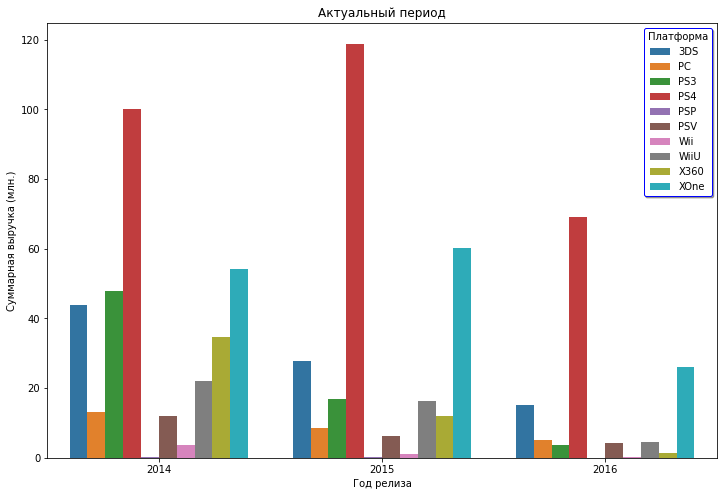

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = "year_of_release", y = "total_sales", hue = "platform", data = df_new)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.legend(fontsize=10, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

**По графикам видно что все платформы в наш период идут на спад, кроме PS4, XOne(они тоже иду на спад но уже в 2016 году), так же можно уже определить потенциально прибыльные платформы**

(0.0, 4.0)

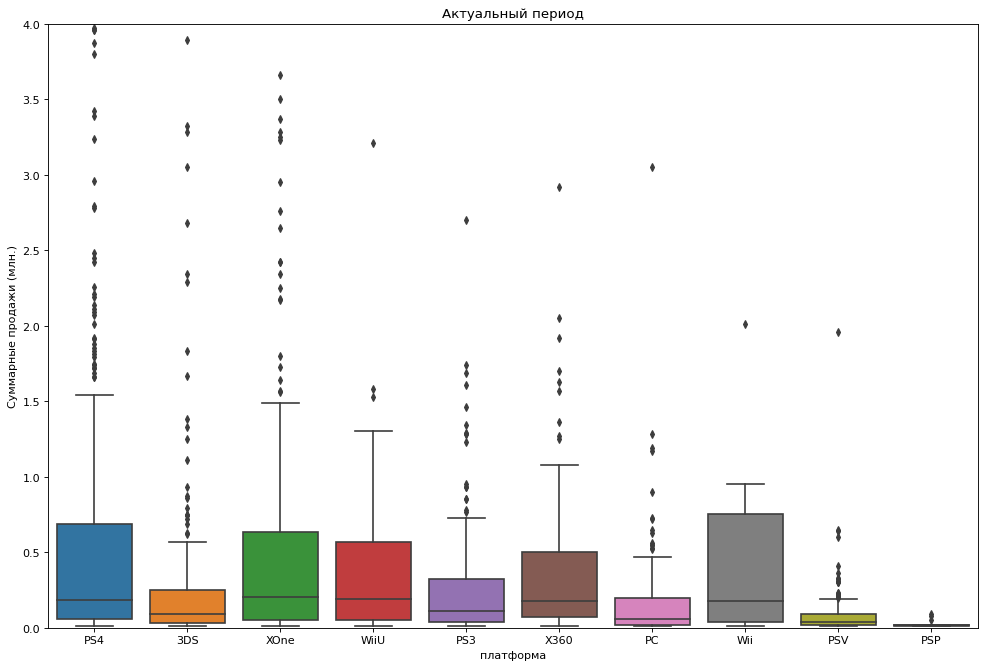

In [41]:
plt.figure(figsize=(15,10), dpi=80)#Рассмотрим ящик с усами для точного определения потенциально прибыльных платформ
sns.boxplot(x='platform', y='total_sales', data=new_df)
plt.xlabel('платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4])

**Выбросы это скорее всего популярные игры на платформе которые принесли большие продажи!**

**При глобальном графике видно что самые прибыльные являются PS4, XOne, X360, WiiU, Wii. Худшие результаты показали старые приставки, что не странно.**

Теперь посмотрим если связь между количеством продаж с оценками пользователей и критиков.

Text(0, 0.5, 'Сумма продаж')

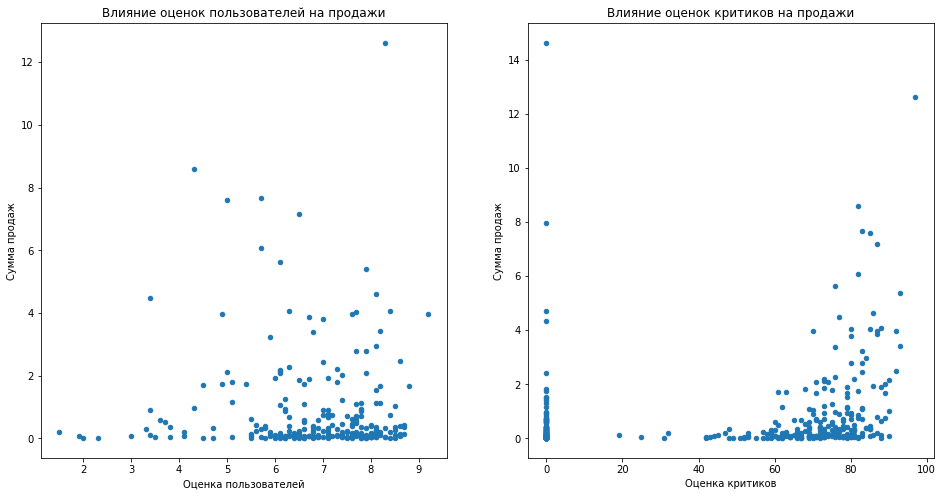

In [42]:
# Возьмем за основу данные по PS4, как популярной платформы 
df_ps4 = new_df.query('platform == "PS4"')

# Построим диаграмму рассеяния

fig, ax = plt.subplots(1, 2)
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', ax=ax[0], figsize=(16,8))
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax[1], figsize=(16,8))

ax[0].set_title('Влияние оценок пользователей на продажи')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Сумма продаж')
ax[1].set_title('Влияние оценок критиков на продажи')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Сумма продаж')

In [43]:
# Посчитаем корреляцию между отзывами и продажами
df_ps4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.377326,-0.040132
critic_score,0.377326,1.000000,0.211837
total_sales,-0.040132,0.211837,1.000000


In [44]:
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int64  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   critic_score     376 non-null    int64  
 9   user_score       242 non-null    float64
 10  rating           376 non-null    object 
 11  total_sales      376 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 38.2+ KB


Видно что оценка критиков имеет небольшую роль, а оценка зрителей не важна

Text(0, 0.5, 'Сумма продаж')

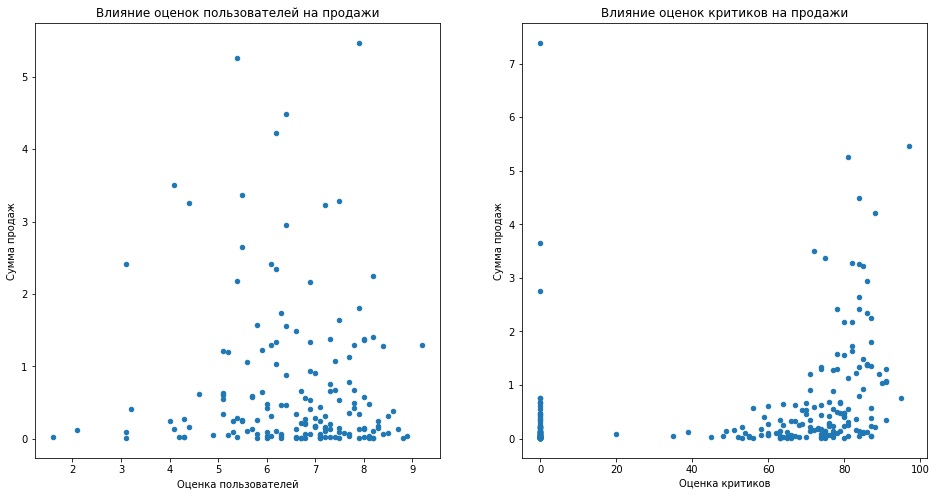

In [45]:
# Возьмем за основу данные по XOne консоли, как другой платформы 
df_xone = new_df.query('platform == "XOne"')

# Построим диаграмму рассеяния

fig, ax = plt.subplots(1, 2)
df_xone.plot(x='user_score', y='total_sales', kind='scatter', ax=ax[0], figsize=(16,8))
df_xone.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax[1], figsize=(16,8))

ax[0].set_title('Влияние оценок пользователей на продажи')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Сумма продаж')
ax[1].set_title('Влияние оценок критиков на продажи')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Сумма продаж')

In [46]:
# посмотрим для остальных платформ
df_xone[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.252023,-0.070384
critic_score,0.252023,1.000000,0.272518
total_sales,-0.070384,0.272518,1.000000


Text(0, 0.5, 'Сумма продаж')

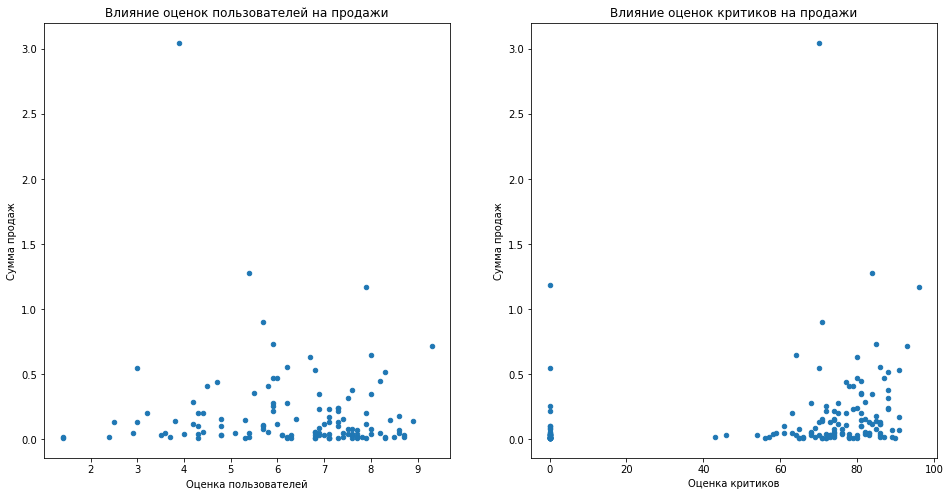

In [47]:
# Возьмем за основу данные по X360 консоли, как другой платформы 
df_pc = new_df.query('platform == "PC"')

# Построим диаграмму рассеяния

fig, ax = plt.subplots(1, 2)
df_pc.plot(x='user_score', y='total_sales', kind='scatter', ax=ax[0], figsize=(16,8))
df_pc.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax[1], figsize=(16,8))

ax[0].set_title('Влияние оценок пользователей на продажи')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Сумма продаж')
ax[1].set_title('Влияние оценок критиков на продажи')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Сумма продаж')

In [48]:
df_pc[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.298884,-0.071597
critic_score,0.298884,1.000000,0.184312
total_sales,-0.071597,0.184312,1.000000


**Вывод остаётся таким же оценка критиков немного влияет на продажи, а оценка пользователей нет** 

***Результаты вывода не изменились***

***Сравнивая самую популярную платформу PS4 с XOne и PC можно сказать что большой разницы нет, что у самой популярной консоли что у остальных есть слабо средняя зависимость от оценки критиков, а вот от оценки пользователей зависимости нет!***  

*Теперь посмотрим на жанры игр*

In [49]:
popular_genre = new_df.groupby('genre', as_index=False)\
    .agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)

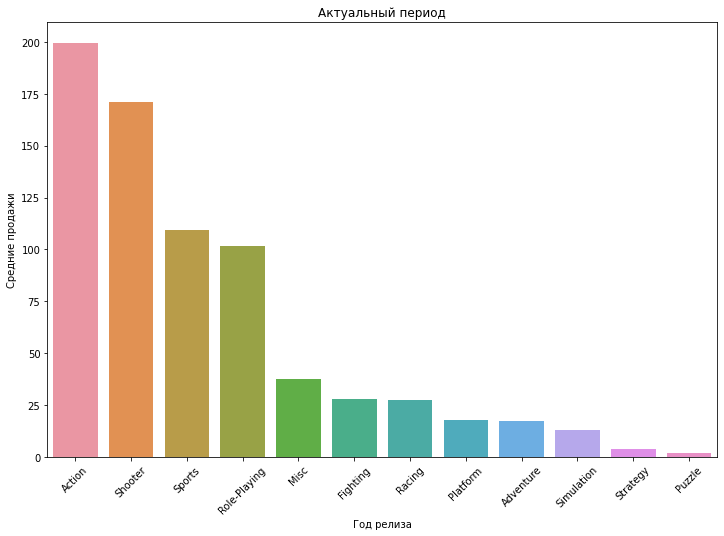

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = 'genre', y = "total_sales", data = popular_genre)
plt.xlabel('Год релиза')
plt.ylabel('Средние продажи')
plt.title('Актуальный период')
plt.xticks(rotation=45)
plt.show()

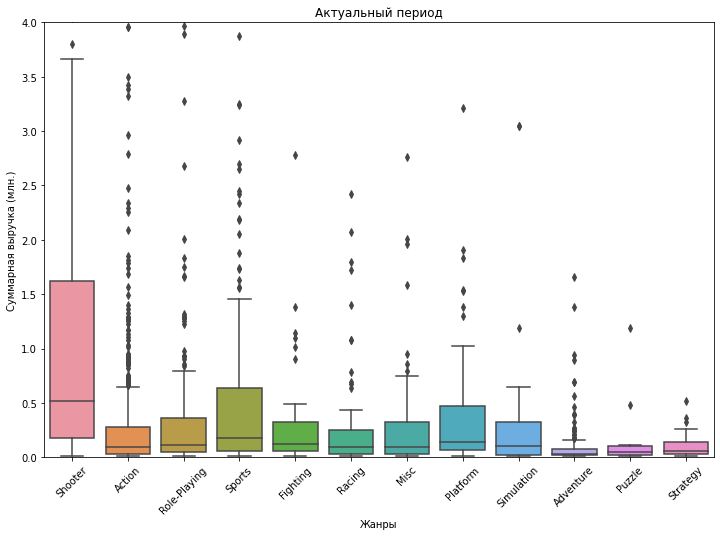

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=new_df)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4])
plt.xticks(rotation=45)
plt.show()

**Среди высоких продаж по графикам выделяются Shooter, Action, Sports, среди низких продаж идут интеллектуальные игры такие как стратегии и пазлы**  

### Обший вывод по шагу 3
**На пике популярности консоли PS4 и XOne**

**Люди играют в легкие развлекательные игры такие как шуторы и экшн**

**Обычно период консолей длится 10 лет**

**Пик продаж идет на 4-й и 5-й год от выпуска консоли**

**Игры на ПК все так же выпускаются но их мало кто берет**

### ШАГ 4 ***Составим портрет пользователя каждого региона***

In [52]:
#Начнем с подбора популярных платформ для региона
def top_region(how_group, region, xlabel, title):
    data = new_df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    data['ratio'] = data[region] / data[region].sum()
    print(data.head())
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(ax=ax, x = how_group, y = data['ratio'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Доля рынка')
    plt.title(title)

  platform  na_sales     ratio
3      PS4     98.61  0.347145
9     XOne     81.27  0.286102
8     X360     28.30  0.099627
0      3DS     22.64  0.079701
2      PS3     22.05  0.077624


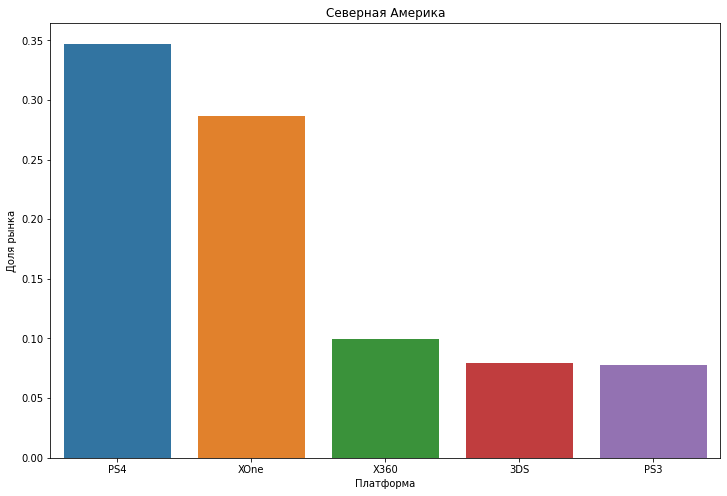

In [53]:
top_region('platform', 'na_sales', 'Платформа', 'Северная Америка')

**В Северной Америке лидирует PS4 и XOne**

  platform  eu_sales     ratio
3      PS4    130.04  0.480420
9     XOne     46.25  0.170866
2      PS3     25.54  0.094355
1       PC     17.97  0.066388
0      3DS     16.12  0.059554


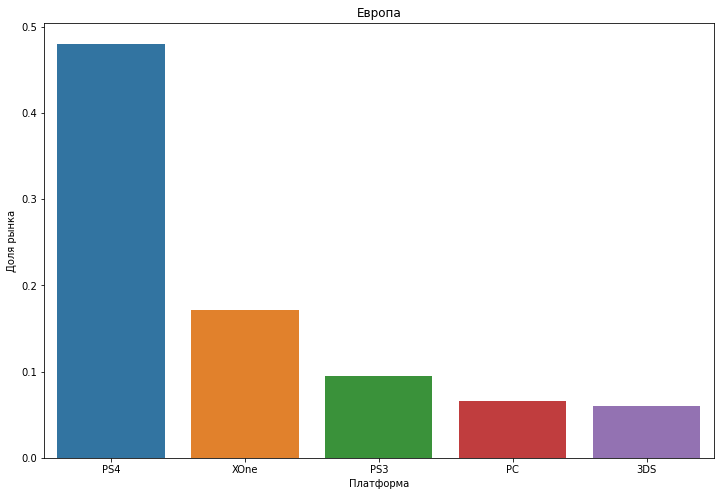

In [54]:
top_region('platform', 'eu_sales', 'Платформа', 'Европа')

**В лидерах все так же, а вот 3-5 место консоли поменялись** 

  platform  jp_sales     ratio
0      3DS     44.24  0.475239
3      PS4     15.02  0.161349
5      PSV     14.54  0.156193
2      PS3     11.22  0.120529
7     WiiU      7.31  0.078526


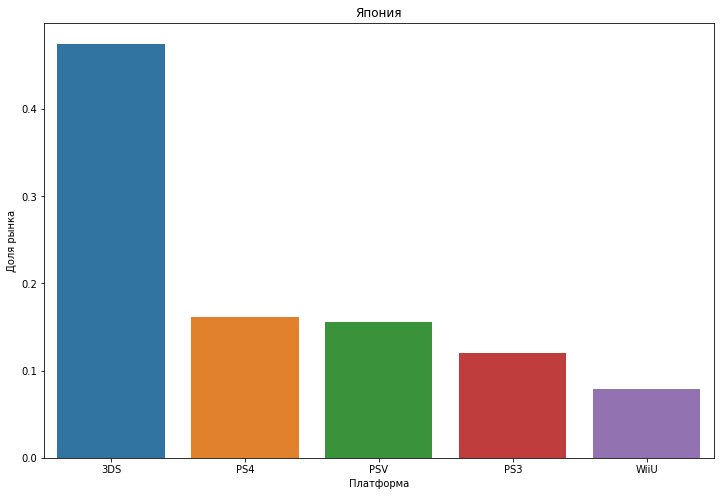

In [55]:
top_region('platform', 'jp_sales', 'Платформа', 'Япония')

**В Японии в лидерах 3DS от Нитендо, а второе место уже PS4**

#### **Выясним популярные жанры**

           genre  na_sales     ratio
8        Shooter     79.02  0.278181
0         Action     72.53  0.255333
10        Sports     46.13  0.162395
7   Role-Playing     33.47  0.117827
3           Misc     15.05  0.052982


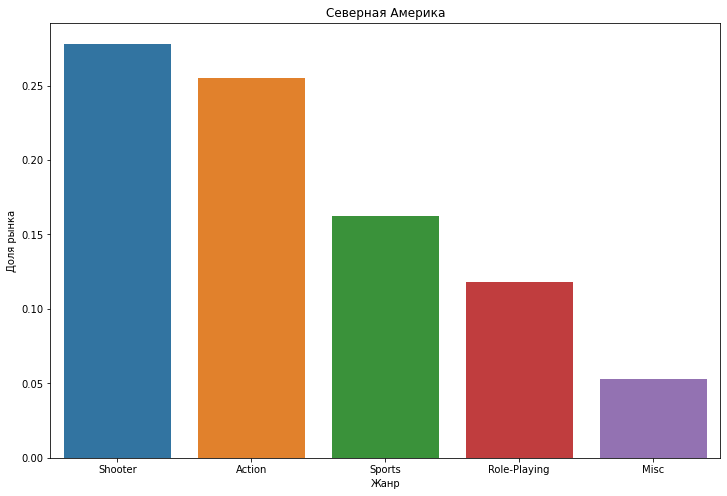

In [56]:
top_region('genre', 'na_sales', 'Жанр', 'Северная Америка')

           genre  eu_sales     ratio
0         Action     74.68  0.275898
8        Shooter     65.52  0.242057
10        Sports     45.73  0.168945
7   Role-Playing     28.17  0.104071
6         Racing     14.13  0.052202


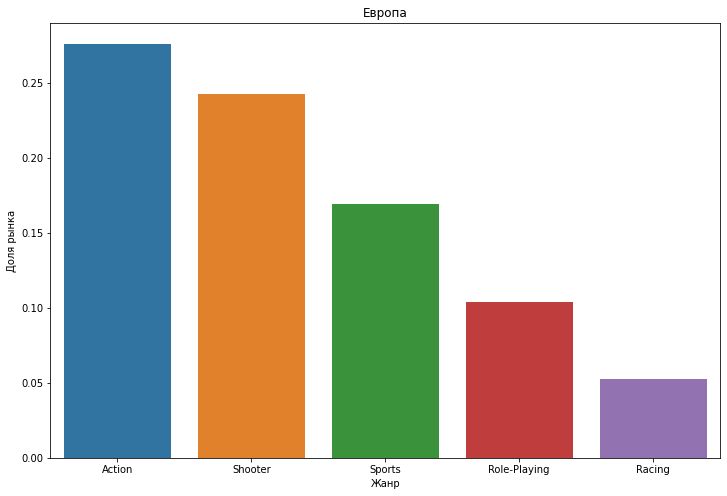

In [57]:
top_region('genre', 'eu_sales', 'Жанр', 'Европа')

          genre  jp_sales     ratio
7  Role-Playing     31.16  0.334730
0        Action     29.58  0.317757
2      Fighting      6.37  0.068428
3          Misc      5.61  0.060264
8       Shooter      4.87  0.052315


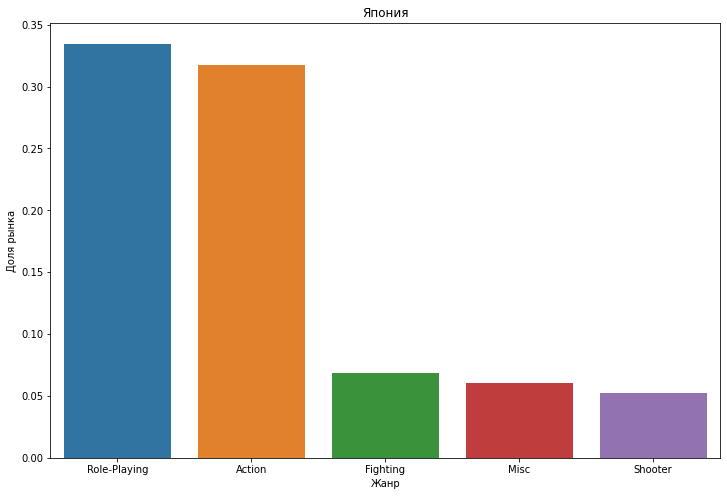

In [58]:
top_region('genre', 'jp_sales', 'Жанр', 'Япония')

**В Северной Америке и Европе лидеруют шутр и экшн, а вот в Японии ролевые игры лидируют**

#### Выясним влияют ли категории ESRB на продажи в отдельном регионе? 

***Итак, как мы помним, что в столбце rating лежат оценки согласно организации ESRB:***

- E - для всех возрастов (все)
- T - для лиц от 13 лет и старше (младший подросток)
- M - от 17 лет и старше (старший подросток)
- E10+ - от 10 лет и старше (ребёнок)
- EC - для всех возрастов (все), тоже самое, что и Е
- RP - оценка ещё не присвоена
- K-A - для всех возрастов (все), тоже самое, что и Е
- AO - для лиц старше 18 лет (взрослый)

Преобразуем их(уберем повторяющие значения категории).

Тогда останется:

- E - для всех возрастов (все)
- T - для лиц от 13 лет и старше (младший подросток)
- M - от 17 лет и старше (старший подросток)
- E10+ - от 10 лет и старше (ребёнок)
- RP - оценка ещё не присвоена
- AO - для лиц старше 18 лет (взрослый)
- O - игры без рейтинга

In [59]:
def top_rating(df, how_group, region, title):
    data = df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(ax=ax, x = how_group, y = region, data = data)
    plt.xlabel('Рейтинг')
    plt.ylabel('Суммарные продажи (млн)')
    plt.title(title)

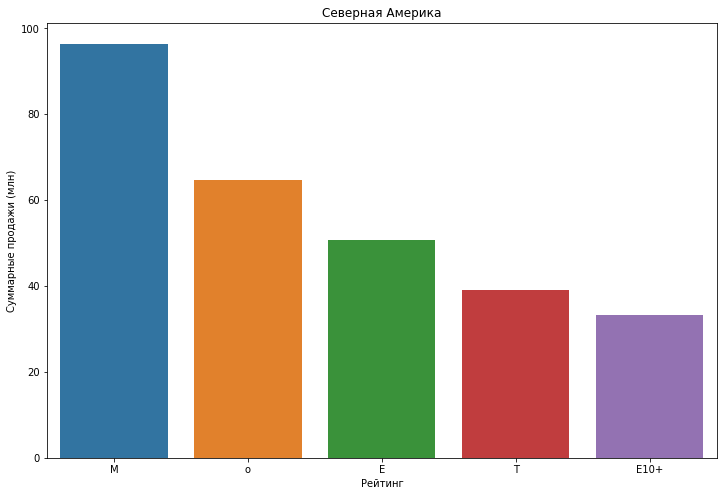

In [60]:
top_rating(new_df, 'rating', 'na_sales', 'Северная Америка')

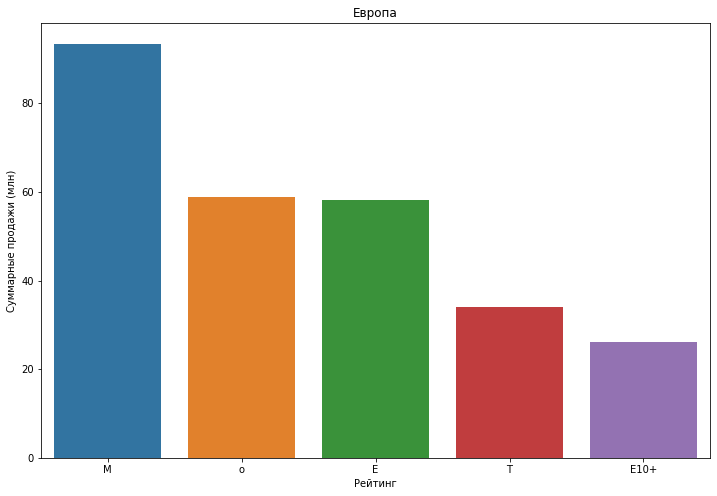

In [61]:
top_rating(new_df, 'rating', 'eu_sales', 'Европа')

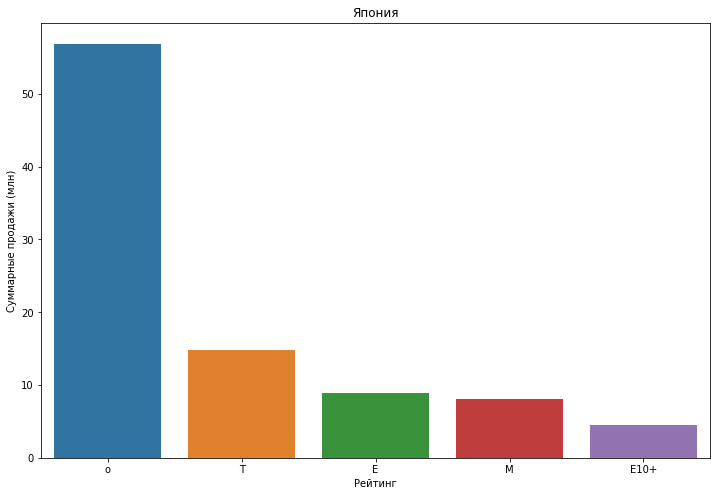

In [62]:
top_rating(new_df, 'rating', 'jp_sales', 'Япония')

**Япония выделилась среди всех и у нее в лидерах игры категори 13 лет и старше, а на втором месте игры для всех, а у Северной Америки и Европы в лидерах игры зи категории 17 лет и старше** 

***При добавление заглушки особого смешения у лидеров не случилось кроме Японии (я думаю что пропуски в Японии могли возникнуть из за нестандартной градации по возрасту или может быть написаны иероглифами) в общем пропусков везде много***

#### Вывод по 4 шагу

**Япония:**

- В лидерах игровые платформы в Японии - японские платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
- В лидерах жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
- Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.

**Северная Америка:**

- В лидерах игровые платформы в Северной Америке (топ-5): PS4, XOne, X360, 3DS, PS3
- В лидерах жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
- Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

**Европа:**

- В лидерах игровые платформы Европе (топ-5): PS4, XOne, PS3, PC, 3DS
- В лидерах жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
- Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

### Шаг 5. Проверьте гипотезы

#### Гипотезы 
**- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

*Сформулируем первую гипотезу.*

(H0) - Нулевая гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

(H1) - Альтернативная гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [63]:
# Перенесем гипотезы в код
H0 = 'Не можем отвергнуть гипотизу - средние пользовательские рейтинги платформ Xbox One и PC одинаковы'
H1 = 'Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC различаются'

# Зададим критический уровень статистической значимости в 5%
# Почему именно в 5 - как одно из широко применяемых значений, точность в 1% в наших вопросах нам не нужна
alpha = 0.05 

# Подготовим выборки
df_xbox_one = new_df.query('platform == "XOne"')
df_pc = new_df.query('platform == "PC"')

Проверим Т-криттерий стьюдента

<AxesSubplot:>

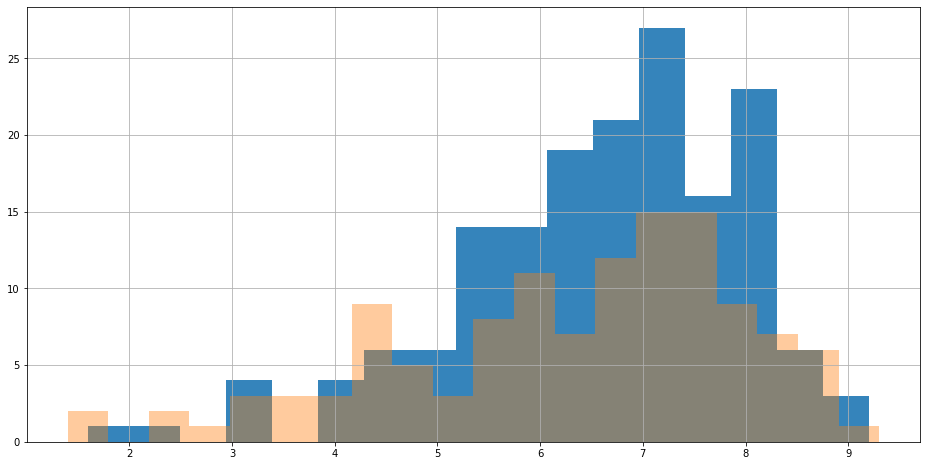

In [64]:
# Посмотрим на распределение оценок
df_xbox_one['user_score'].hist(bins=17, alpha=0.9, figsize=(16,8))
df_pc['user_score'].hist(bins=20, alpha=0.4, figsize=(16,8))

In [65]:
# Посмотрим на общее количество данных
print('PC count =', df_pc['user_score'].count())
print('Xbox count =', df_xbox_one['user_score'].count())

PC count = 122
Xbox count = 165


В нашем случае мы имеем количественные данные в двух независимых группах, которые распределены нормально. При этом наши выборки не сверхмалы и не содержат явных выбросов. Поэтому Т-криттерий Стьюдента нам подходит для использования.

In [66]:
# equal_var = False, т.к. различаются дисперсии выборок
results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var = False)

if results.pvalue < alpha:
    print(H1)
else:
    print(H0)

Не можем отвергнуть гипотизу - средние пользовательские рейтинги платформ Xbox One и PC одинаковы


In [67]:
#Посмотрим какие вообще средние оценки
print('XBOX user score mean = ', df_xbox_one['user_score'].mean())
print('PC user score mean = ', df_pc['user_score'].mean())

XBOX user score mean =  6.594545454545454
PC user score mean =  6.298360655737704


#### Проверим другую гипотезу
**Для начала сформулируем гипотезы H0 и H1.**

*Гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковы (т.е. жанры получают примерно равные оценки)*

*Гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются (т.е. данные жанры в среднем получают разные оценки)*

In [68]:
# Перенесем гипотезы в код
H0 = 'Не можем отвергнуть гипотизу - cредние пользовательские рейтинги жанров Action и Sports одинаковы'
H1 = 'Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются'

# Подготовим выборки
df_action = new_df.query('genre == "Action" and user_score > 0')
df_sports = new_df.query('genre == "Sports" and user_score > 0')


Также проверим распределение величин

<AxesSubplot:>

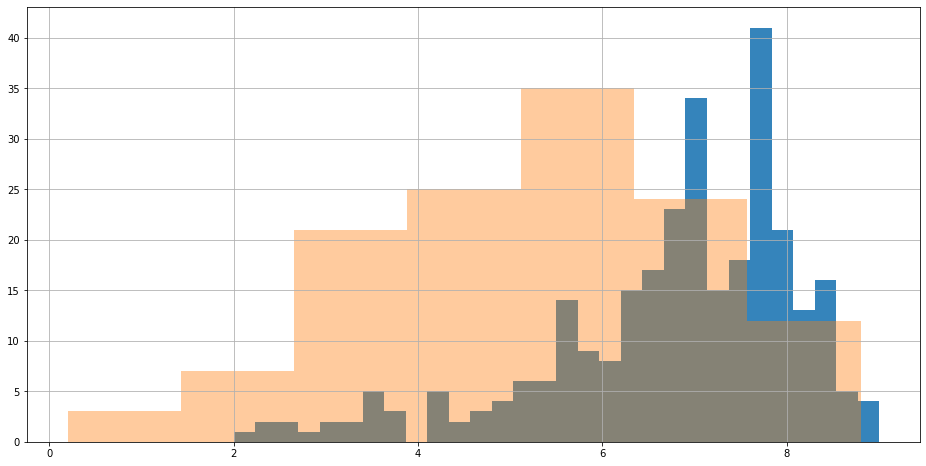

In [69]:
# Посмотрим на распределение оценок
df_action['user_score'].hist(bins=30, alpha=0.9, figsize=(16,8))
df_sports['user_score'].hist(bins=7, alpha=0.4, figsize=(16,8))

In [70]:
# Посмотрим на общее количество данных
print('PC count =', df_action['user_score'].count())
print('Xbox count =', df_sports['user_score'].count())

PC count = 297
Xbox count = 127


**используем Т-криттерий стьюдента**

In [71]:
# equal_var = true, т.к. совокупности по параметрам не различаются
# критический уровень не переопределяем, оставим также 5 процентов
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

if results.pvalue < alpha:
    print(H1)
else:
    print(H0)

Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются


In [72]:
# Ради интереса посмотрим какие вообще средние оценки
print('Action user score mean = ', df_action['user_score'].mean())
print('Sports user score mean = ', df_sports['user_score'].mean())

Action user score mean =  6.760606060606061
Sports user score mean =  5.2251968503937


### Шаг 6 Общий вывод 

**Общий вывод**
***Мы провели качественную работу, чтобы выявить закономерности, определяющие успех наших игр.***

Для этого мы:

1. Изучили наши данные. 
2. Провели небольшую подготовку, заполнили недостающие значения, удалили дубликаты и избавились от ненужных значений (TBD)
3. Провели небольшое исследование наших данных:
- Выяснили, что средний срок жизни платформы 10 лет 
- Выделили три платформы, на которые стоит отдельно обратить внимание - PS4, Xbox One, PC
- Обратили внимание, что в целом за весь период хорошо себя показывают консоли семейста PS (2, 3, 4)
- Обнаружили, что оценки критиков оказывают более весомое влияние на продажи, чем оценки пользователей
- Выяснили, что самыми прибыльными жанрами являются шутеры, платформеры, спортивные игры
4. Отдельно исследовали предпочтения каждого из трех представленных регионов (Северной Америки, Европы и Японии)
а) Обнаружили, что самым прибыльным регионом является Северная Америка, а Япония приносит меньше всего денег
б) При этом в каждом регионе свои лидеры среди платформ по продажам
- В Северной Америке это X360
- В Японии - Nintendo DS
- В Европе - PS4
в) Самой прогрессивной по отношению к новым платформам можно считать Европу
г) Наиболее универсальной платформой для всех является PS3
д) Также, мы увидели, что предпочтения в самих играх у Европы и Америки, в целом, схожи, а вот в Японии явно выделяется любовь к ролевым и приключенческим играм.
е) И шутеры в Японии ценятся не особо, хотя их очень любят в Европе и Америке
ж) Общим по популярности жанром для каждого региона можно считать Action
з) Также мы обнаружили, что в Японии пользователи более консервативны в выборе игр и предпочитают игры с менее взрослым рейтингом, в то время как в Европе и Америке, чуть больше предпочтения отдается играм со взрослым рейтингом.
5. Кроме этого, мы проверили наши гипотезы и выяснили, что
а) Средние пользовательские рейтинги платформ Xbox One и PC различаются
б) Также как и cредние пользовательские рейтинги жанров Action и Sports различаются

**Общий итог**

Целью нашего исследования было выявление закономерностей, определяющих успех игр, что в дальнейшем будет использоваться при планировании рекламных кампаний.

Исходя из нашего исследования, стоит сделать ставку на:

1. Игры жанра шутеры, платформеры и спортивные игры. Также стоит обратить внимание на жанр Action как наиболее универсальный для всех регионов
2. Больше всего денег тратят на игры жители Северной Америке - поэтому в целом, стоит ориентироваться на этот рынок, как наиболее прибыльный.
- Однако стоит не забывать, что общие предпочтения схожи с Европой, поэтому рекламные кампании для этих двух регионов могут быть схожи. Т.е. можно попытаться сразу задействовать оба рынка.
3. Япония слишком специфичный рынок, со своими предпочтениями, приносящий мало денег на общем фоне. Возможно, стоит исключить его из рекламных кампаний.
4. Если говорить про платформу, на которую делать ставку в ближайшее время, то это явно PS4, т.к. она показывает хороший рост и вышла относительно недавно. К тому же, ее предшественники PS2 и PS3 продемонстрировали отличный финансовый результат и лидерство.
- Кроме того, не следует забывать, что в Северной Америке предпочитают X360, а значит потенциально там может чуть лучше выстрелить XOne. Т.е. если ориентироваться именно на рынок Америки, стоит сделать акцент сразу на две платформы - XOne и PS4.
- PC и Nintendo показывают хорошие сроки жизни, но низкую прибыль. Однако за их постоянство, стоит также выделить им определенный рекламный бюджет для страховки (чтобы не класть все яйца в одну корзину)
- Оставшиеся платформы или не приносят столько денег, или уже отживают свой срок жизни